<a href="https://colab.research.google.com/github/SuddhashilSarkar/Breast-Cancer-Prediction-using-ML/blob/main/model/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install joblib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import joblib

# Suppress warnings
warnings.filterwarnings('ignore')


In [3]:
# Load dataset
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# Prepare data
x = cancer.data[:, :2]  # Use only the first two features
y = cancer.target
y_label = cancer.target_names

In [5]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
# Initialize and train SVM model
svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(x_train, y_train)

SVC(C=1, gamma=0.5)

In [7]:
# Predict outcomes on the test set
y_pred = svm_model.predict(x_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=cancer.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

   malignant       0.88      0.79      0.83        63
      benign       0.89      0.94      0.91       108

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171



[0]
malignant


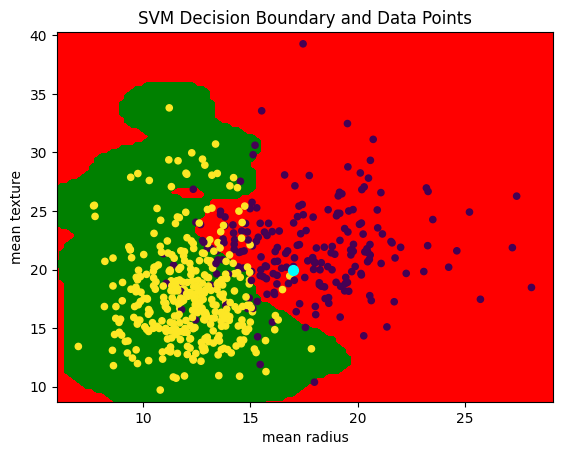

In [8]:
# Define colormap for plotting decision boundaries
mucol = matplotlib.colors.ListedColormap(["red", "green"])
# Plot decision boundary
DecisionBoundaryDisplay.from_estimator(
    svm_model,                      # The trained SVM model
    x,                             # Input data with only 2 features
    response_method="predict",      # Method to generate predictions
    xlabel=cancer.feature_names[0], # Label for the x-axis
    ylabel=cancer.feature_names[1], # Label for the y-axis
    cmap=mucol                      # Colormap for the plot
)

radius = x[:,0]
txt= x[:,1]

# Plot data points
plt.scatter(radius, txt, c=y, s=20)

# Plot details
plt.title('SVM Decision Boundary and Data Points')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])

yp=svm_model.predict([[17,20]])
plt.scatter(17,20, color="cyan", s=50)
print(yp)
print(y_label[yp[0]])
# Show the plot
plt.show()

In [9]:
joblib.dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']